## Solutions

<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 1.4: Exercise</b>
Are the nodes with the highest centralities same? In the network, plot the nodes with highest centralities.
</p>

In [1]:
# Upload python modules
import numpy as np
import networkx as nx
import powerlaw

# Import python modules for visualizations
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the edgelist from STRING
import pandas as pd
edge_list = pd.read_table("Data/1_STRING_network.tsv")

# Creating network from edge list 
import networkx as nx
STRING_PPI = nx.from_pandas_edgelist(df = edge_list,
                            source = "node1", 
                            target = "node2",
                            edge_attr = "combined_score")
STRING_PPI_pos = nx.spring_layout(STRING_PPI, seed = 20)
# nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

In [3]:
# Calculate the centralities
degree_centrality = nx.degree_centrality(STRING_PPI)
degree_centrality = {key : round(degree_centrality[key], 2) for key in degree_centrality}

betweenness_centrality = nx.betweenness_centrality(STRING_PPI)
betweenness_centrality = {key : round(betweenness_centrality[key], 2) for key in betweenness_centrality}

closeness_centrality = nx.closeness_centrality(STRING_PPI)
closeness_centrality = {key : round(closeness_centrality[key], 2) for key in closeness_centrality}

eccentricity_centrality = nx.eccentricity(STRING_PPI)

centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality),
                                    "Eccentricity" : pd.Series(eccentricity_centrality)})

In [4]:
# Print top genes by centrality
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:1].index)
top_betweenness = list(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:1].index)
top_closeness = list(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:1].index)
top_eccentricity = list(centrality_table.sort_values(by = "Eccentricity", ascending = False)[0:1].index)
print(top_degree)
print(top_betweenness)
print(top_closeness)
print(top_eccentricity)

['SOCS3']
['AR']
['HSP90AA1']
['FOXA1']


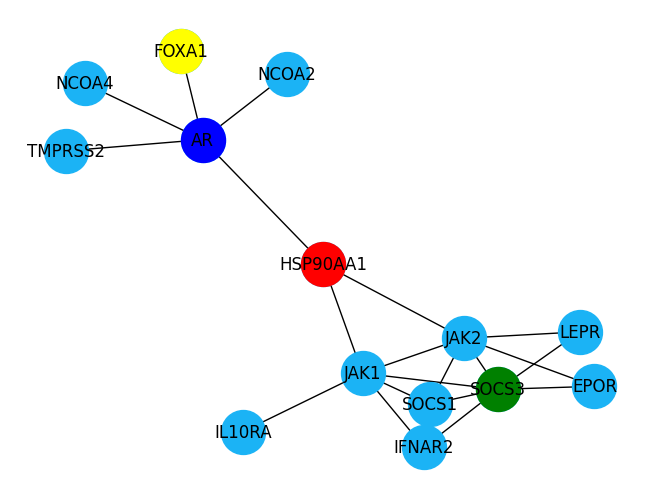

In [5]:
nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_degree, node_size = 1000, node_color = "green")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_betweenness, node_size = 1000, node_color = "blue")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_closeness, node_size = 1000, node_color = "red")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_eccentricity, node_size = 1000, node_color = "yellow")
plt.show()

### Exercise session 1

#### Part A: Basic network properties
- Load the network in Data/STRING_Covid_net.csv
- Retrieve the basic properties of the network like number of nodes, edges, density, diameter, radius, etc
- How many connected components are there in the network?
- Is the network modular?
- Plot the degree distribution? Is the network a scale free network?

Note: Instead of using the entire network, you may use the largest connected component.


In [6]:
# Reading the network
edge_list = pd.read_csv("Data/STRING_Covid_net.csv")
edge_list.shape

(368, 5)

81 368


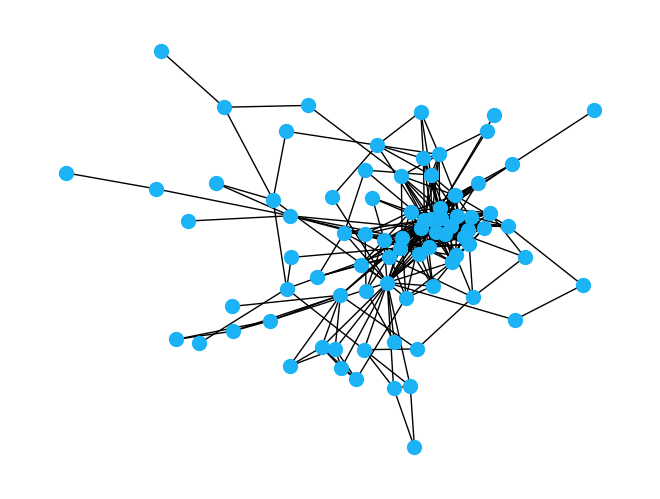

In [7]:
# Creating network from edge list 
STRING_net = nx.from_pandas_edgelist(df = edge_list,
                                        source = "from_geneSymbol", 
                                        target = "to_geneSymbol",
                                        edge_attr = "combined_score")
STRING_net_pos = nx.spring_layout(STRING_net, seed = 123)
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, with_labels = False, pos = STRING_net_pos, node_size = 100, node_color = "#1BB3F5")

In [8]:
# Get basic properties of the network
print("Number of nodes:", STRING_net.number_of_nodes())
print("Number of edges:", STRING_net.number_of_edges())
print("Number of connected components:", nx.number_connected_components(STRING_net))
print("Network modularity:", nx.algorithms.community.modularity(STRING_net, nx.connected_components(STRING_net)))
print("Number of isolated nodes:", nx.number_of_isolates(STRING_net))
print("Number of self loops:", nx.number_of_selfloops(STRING_net))

Number of nodes: 81
Number of edges: 368
Number of connected components: 1
Network modularity: 0.0
Number of isolated nodes: 0
Number of self loops: 0


In [9]:
# Extract the largest connected component
STRING_net = list(STRING_net.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_net), key = len, reverse = True))[0]
print(len(STRING_net.nodes()), len(STRING_net.edges()))
# nx.draw(STRING_net, with_labels = True, node_size = 1000, node_color = "#1BB3F5")


81 368


In [10]:
# Get basic properties of the network
print("Number of nodes:", STRING_net.number_of_nodes())
print("Number of edges:", STRING_net.number_of_edges())
print("Number of connected components:", nx.number_connected_components(STRING_net))
print("Network modularity:", nx.algorithms.community.modularity(STRING_net, nx.connected_components(STRING_net)))
print("Number of isolated nodes:", nx.number_of_isolates(STRING_net))
print("Number of self loops:", nx.number_of_selfloops(STRING_net))

Number of nodes: 81
Number of edges: 368
Number of connected components: 1
Network modularity: 0.0
Number of isolated nodes: 0
Number of self loops: 0


In [11]:
# Calculate the diameter and radius of the largest connected component [takes long time]
print("Diameter of network:", nx.diameter(STRING_net))
print("Radius of network:", nx.radius(STRING_net))

Diameter of network: 6
Radius of network: 4


In [12]:
print("Average clustering coefficient:", nx.average_clustering(STRING_net))
print("Average shortest path length:", nx.average_shortest_path_length(STRING_net))
print("Network density:", nx.density(STRING_net))

Average clustering coefficient: 0.47680635915361474
Average shortest path length: 2.645679012345679
Network density: 0.11358024691358025


In [13]:
# Find the top five nodes with highest centralities [takes long time]
degree_centrality = nx.degree_centrality(STRING_net)
betweenness_centrality = nx.betweenness_centrality(STRING_net)
closeness_centrality = nx.closeness_centrality(STRING_net)

centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality)})

print(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:5].index.values)
print(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:5].index.values)
print(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:5].index.values)


['TNF' 'IL6' 'IL1B' 'MTOR' 'CXCL8']
['MTOR' 'TNF' 'IL6' 'IL1B' 'PPIA']
['TNF' 'IL6' 'IL1B' 'MTOR' 'CXCL8']


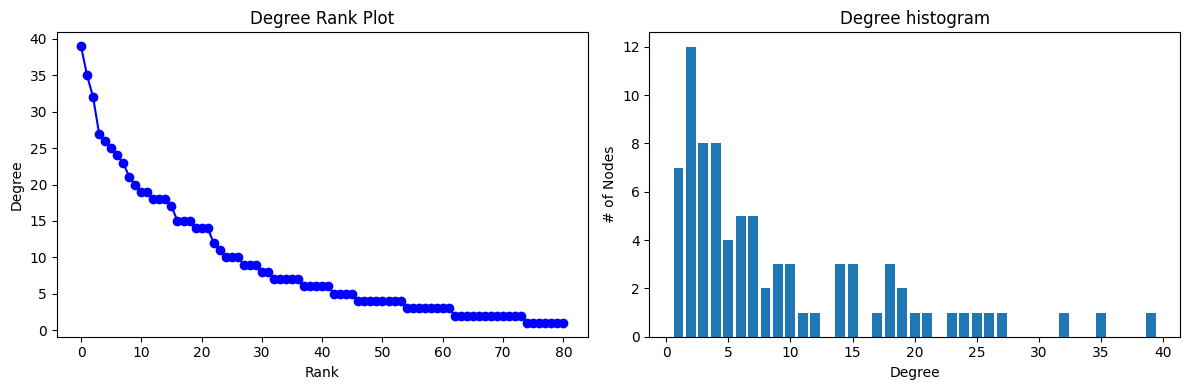

In [14]:
# Plot degree distribution
degree_sequence = sorted((d for n, d in STRING_net.degree()), reverse=True)
dmax = max(degree_sequence)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

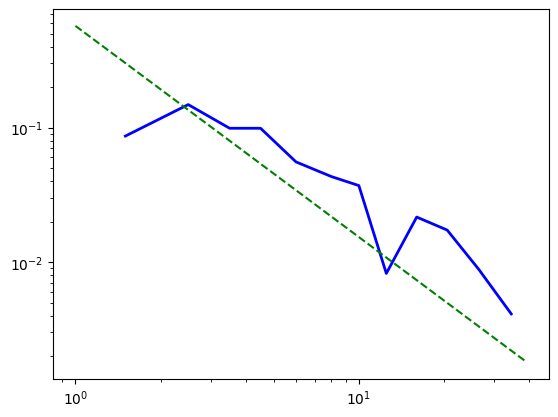

Value of alpha: 1.5699809208648183


In [15]:
# Fit power law
degree_sequence = sorted([d for n, d in STRING_net.degree()], reverse=True) # used for degree distribution and powerlaw test

fit = powerlaw.Fit(degree_sequence, xmin=1) 

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
plt.show()
print("Value of alpha:", fit.power_law.alpha)


#### Part B: Network data mining
SARS-Cov-2 infection requires binding of the virus spike protein to human ACE2 protein and priming of the spike protein by TMPRSS2. Use RWR to identify potential biomarkers for the disease.

<strong>Files to use:</strong>
Network: Data/STRING_Covid_net.csv

In [ ]:
# Upload python modules
import networkx as nx
import pandas as pd
# Import python modules for visualizations
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Reading the human interactome from Gysi et al., 2021 
edge_list = pd.read_csv("Data/STRING_Covid_net.csv")

# Creating network from edge list 
STRING_net = nx.from_pandas_edgelist(df = edge_list,
                                        source = "from_geneSymbol", 
                                        target = "to_geneSymbol",
                                        edge_attr = "combined_score")
STRING_net_pos = nx.spring_layout(STRING_net, seed = 123)
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, with_labels = False, pos = STRING_net_pos, node_size = 100, node_color = "#1BB3F5")

In [ ]:
# Remove self-loops
STRING_net.remove_edges_from(nx.selfloop_edges(STRING_net))

# Extract the largest connected component
STRING_net = list(STRING_net.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_net), key = len, reverse = True))[0]
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, pos = STRING_net_pos, with_labels = True, node_size = 100, node_color = "#1BB3F5")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=567e54c1-8e1f-4560-8621-8b304ec1f642' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>